In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [6]:
# Load the data
dir = '../data/'
df_figures = pd.read_csv(dir + 'date_brand_figures.csv', header=0, sep=';')
df_features = pd.read_csv(dir + 'date_brand_features.csv', header=0, sep=';')
df_allbrands = pd.read_csv(dir + 'all_brands.csv', header=0, sep=';')


In [4]:
df_figures.head()

,period_end_date,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes
0,2019-12-07,Versace,22066189.0,97.0,13.0,16239.0,6112205.0
1,2021-01-30,Versace,24289963.0,54.0,2.0,13358.0,3189144.0
2,2016-05-14,Versace,7137442.0,42.0,8.0,15894.0,2152955.0
3,2019-04-20,Versace,18901125.0,73.0,9.0,26762.0,5224916.0
4,2023-03-25,Versace,30251374.0,54.0,10.0,25681.0,5760987.0


### Time Series Plot for Top-10 Brands

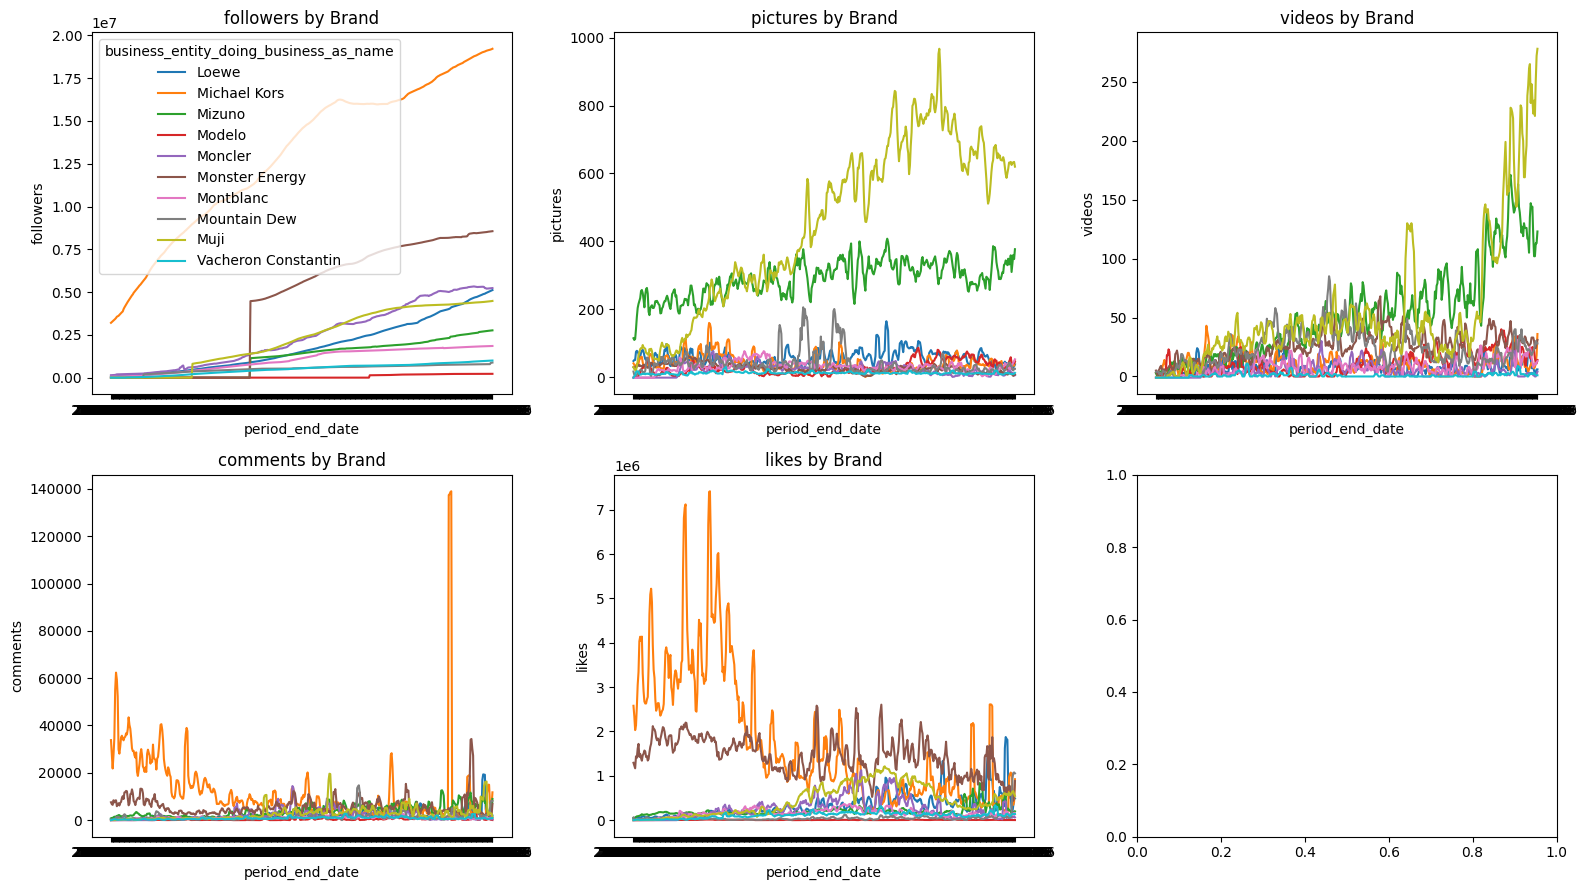

In [12]:
df_figures_sorted = df_figures.sort_values(by=['business_entity_doing_business_as_name', 'period_end_date'])
df_figures_10_brands = df_figures_sorted[df_figures_sorted['business_entity_doing_business_as_name'].isin(df_figures_sorted['business_entity_doing_business_as_name'].value_counts().head(10).index)]
trends_columns = df_figures.columns[-5:]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
for index, column in enumerate(trends_columns):
    legend = True if index == 0 else False
    sns.lineplot(data=df_figures_10_brands, x='period_end_date', y=column, hue='business_entity_doing_business_as_name', palette='tab10', ax=axes[index//3, index%3], legend=legend)
    axes[index//3, index%3].set_title(f'{column} by Brand')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

### Time Series Plot for All Brands

In [7]:
df_allbrands.head()

,period_end_date,compset_group,compset,followers,pictures,videos,comments,likes
0,2019-01-05,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,577822196.0,10851.0,1726.0,711070.0,110228425.0
1,2020-10-10,Apparel Retail,Omnichannel Apparel Retail,374077484.0,13141.0,1352.0,659640.0,71433543.0
2,2021-05-15,Fitness & Exercise,Fitness & Exercise,12247138.0,2207.0,570.0,81662.0,1814642.0
3,2023-05-27,Food Products,Snack Bars,2053344.0,147.0,81.0,56011.0,48641.0
4,2023-05-06,Food Products,Food Products,8001015.0,538.0,439.0,71680.0,258727.0


In [9]:
df_allbrands_sorted = df_allbrands.sort_values(by=['period_end_date'])

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='perio

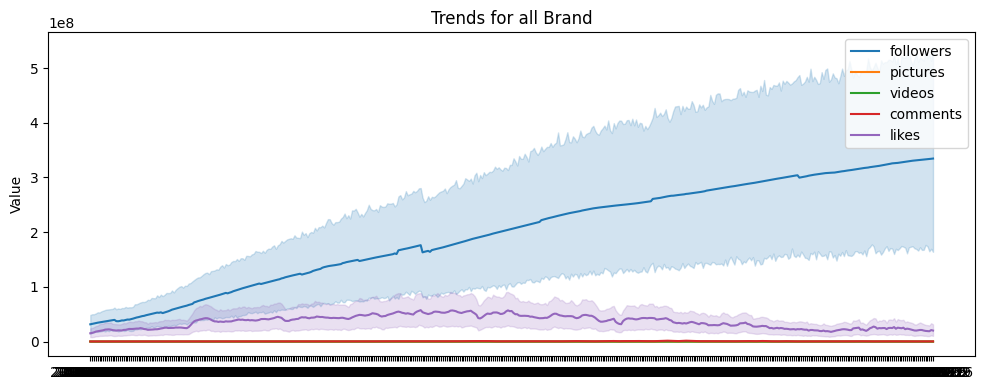

In [13]:
columns = df_allbrands_sorted.columns[-5:]
plt.figure(figsize=(10, 4))
for index, column in enumerate(columns):
    sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
plt.xlabel('')
plt.ylabel('Value')
plt.title('Trends for all Brand')
plt.tight_layout()
plt.show()

In [12]:
df_allbrands_sorted.head()

,period_end_date,compset_group,compset,followers,pictures,videos,comments,likes
13881,2015-01-03,Luxury & Premium & Mainstream,Hard Luxury,5208585.0,431.0,32.0,27745.0,1249952.0
6169,2015-01-03,Restaurants,QSR,136754.0,2193.0,89.0,35890.0,1113280.0
2416,2015-01-03,Apparel Retail,US Discount Store,434875.0,203.0,NaN,10537.0,560780.0
17542,2015-01-03,Fitness & Exercise,Fitness & Exercise,NaN,245.0,30.0,6393.0,97589.0
14993,2015-01-03,Sporting Goods,Sporting Goods,305402.0,129.0,13.0,17864.0,844336.0
